# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Annisaa Irsalina Razita
- **Email:** annisaairsalinarazita@gmail.com
- **ID Dicoding:** annisaairsalina

## Menentukan Pertanyaan Bisnis

- Bagaimana pola fluktuasi kadar PM10 dan N02 sepanjang tahun?
- Bagaimana pengaruh faktor cuaca terhadap kadar PM10?

## Import Semua Packages/Library yang Digunakan

In [13]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from scipy.stats import f_oneway

# mengimport visualisasi libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set style untuk seaborn
sns.set_style("whitegrid")

## Data Wrangling

### Gathering Data

In [3]:
# Memuat dataset
data = pd.read_csv("https://raw.githubusercontent.com/annisaairsa/air-quality/refs/heads/main/dashboard/PRSA_Data_Huairou_20130301-20170228.csv")

### Assessing Data

In [17]:
initial_assessment = data.head() # Use the correct DataFrame name 'data'
initial_columns = data.columns # Use the correct DataFrame name 'data'
initial_datatypes = data.dtypes # Use the correct DataFrame name 'data'

initial_assessment, initial_columns, initial_datatypes

(   No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
 0   1  2013      3    1     0    7.0   7.0  3.0  2.0  100.0  91.0  -2.3   
 1   2  2013      3    1     1    4.0   4.0  3.0  NaN  100.0  92.0  -2.7   
 2   3  2013      3    1     2    4.0   4.0  NaN  NaN  100.0  91.0  -3.2   
 3   4  2013      3    1     3    3.0   3.0  3.0  2.0    NaN   NaN  -3.3   
 4   5  2013      3    1     4    3.0   3.0  7.0  NaN  300.0  86.0  -4.1   
 
      PRES  DEWP  RAIN   wd  WSPM  station  
 0  1020.3 -20.7   0.0  WNW   3.1  Huairou  
 1  1020.8 -20.5   0.0  NNW   1.5  Huairou  
 2  1020.6 -21.4   0.0   NW   1.8  Huairou  
 3  1021.3 -23.7   0.0  NNW   2.4  Huairou  
 4  1022.1 -22.7   0.0  NNW   2.2  Huairou  ,
 Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
        'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
       dtype='object'),
 No           int64
 year         int64
 month        int64
 day          int64
 hour       

**Insight:**
- xxx
- xxx

### Cleaning Data

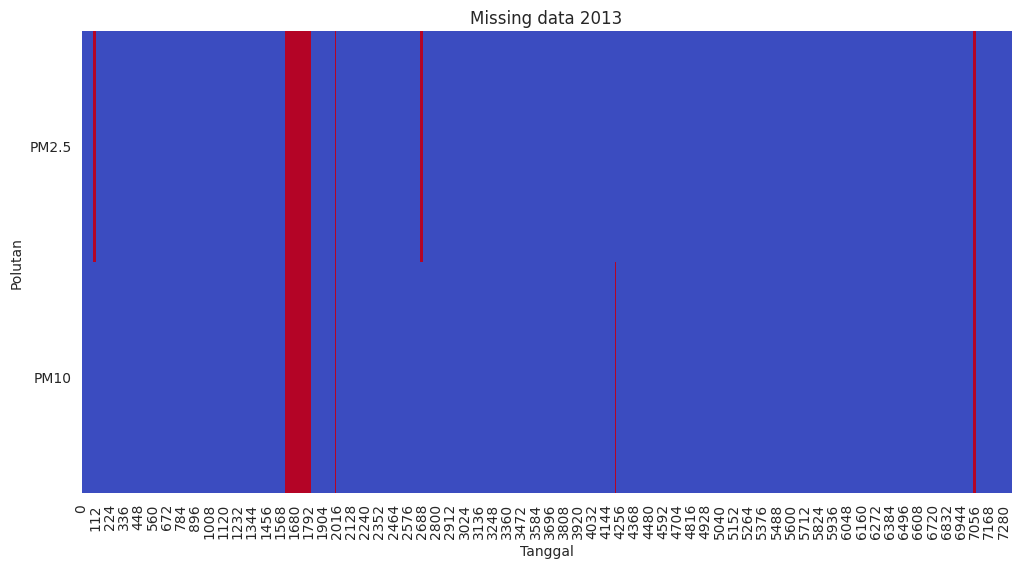

(No         0.000000
 year       0.000000
 month      0.000000
 day        0.000000
 hour       0.000000
 PM2.5      2.717887
 PM10       2.215948
 SO2        2.794889
 NO2        4.674310
 CO         4.055441
 O3         3.282569
 TEMP       0.145448
 PRES       0.151152
 DEWP       0.151152
 RAIN       0.156856
 wd         0.861282
 WSPM       0.139744
 station    0.000000
 dtype: float64,
 PM2.5         292
 PM10          250
 year     14783472
 dtype: int64)

In [19]:
missing_percentage = data.isnull().mean() * 100 # Changed 'df' to 'data'
cols_to_plot = ['PM2.5', 'PM10']
data_missing = data[cols_to_plot].isnull() # Changed 'df' to 'data'
data_missing['year'] = data['year'] # Changed 'df' to 'data'
data_missing_2013 = data_missing[data_missing['year'] == 2013]
plt.figure(figsize=(12, 6))
sns.heatmap(data_missing_2013.drop('year', axis=1).T, cmap='coolwarm', cbar=False)
plt.title('Missing data 2013')
plt.xlabel('Tanggal')
plt.ylabel('Polutan')
plt.yticks(rotation=0)
plt.show()

missing_percentage, data_missing_2013.sum()

## Exploratory Data Analysis (EDA)

- Ringkasan data statistik
- Analisis Tren Jangka Panjang Tingkat PM10
- Uji ANOVA untuk Perbedaan Tahunan Tingkat PM10
- Analisis Tren Musiman dan Korelasi dengan Kondisi Cuaca

In [33]:
# Create an imputer object with strategy='most_frequent' for non-numeric data
imputer = SimpleImputer(strategy='most_frequent') # Use 'most_frequent' for non-numeric columns

# Fit the imputer to your data and transform it
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

summary_statistics = data_imputed.describe()
summary_statistics

,year,month,day,hour,PM10,NO2
count,8.0,8.000000,8.000000,8.00000,8.000000,8.000000
mean,2023.0,2.500000,18.125000,11.50000,53.050000,27.375000
std,0.0,1.195229,9.062284,2.44949,8.019263,3.194974
min,2023.0,1.000000,5.000000,8.00000,45.600000,23.100000
25%,2023.0,1.750000,11.500000,9.75000,45.600000,25.200000
50%,2023.0,2.500000,17.500000,11.50000,52.150000,27.900000
75%,2023.0,3.250000,25.750000,13.25000,56.575000,29.275000
max,2023.0,4.000000,30.000000,15.00000,67.800000,32.000000


## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-67-fb7cb81dcdcd>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_time_series = data_imputed[['date', 'PM10', 'NO2']].set_index('date').resample('M').mean()


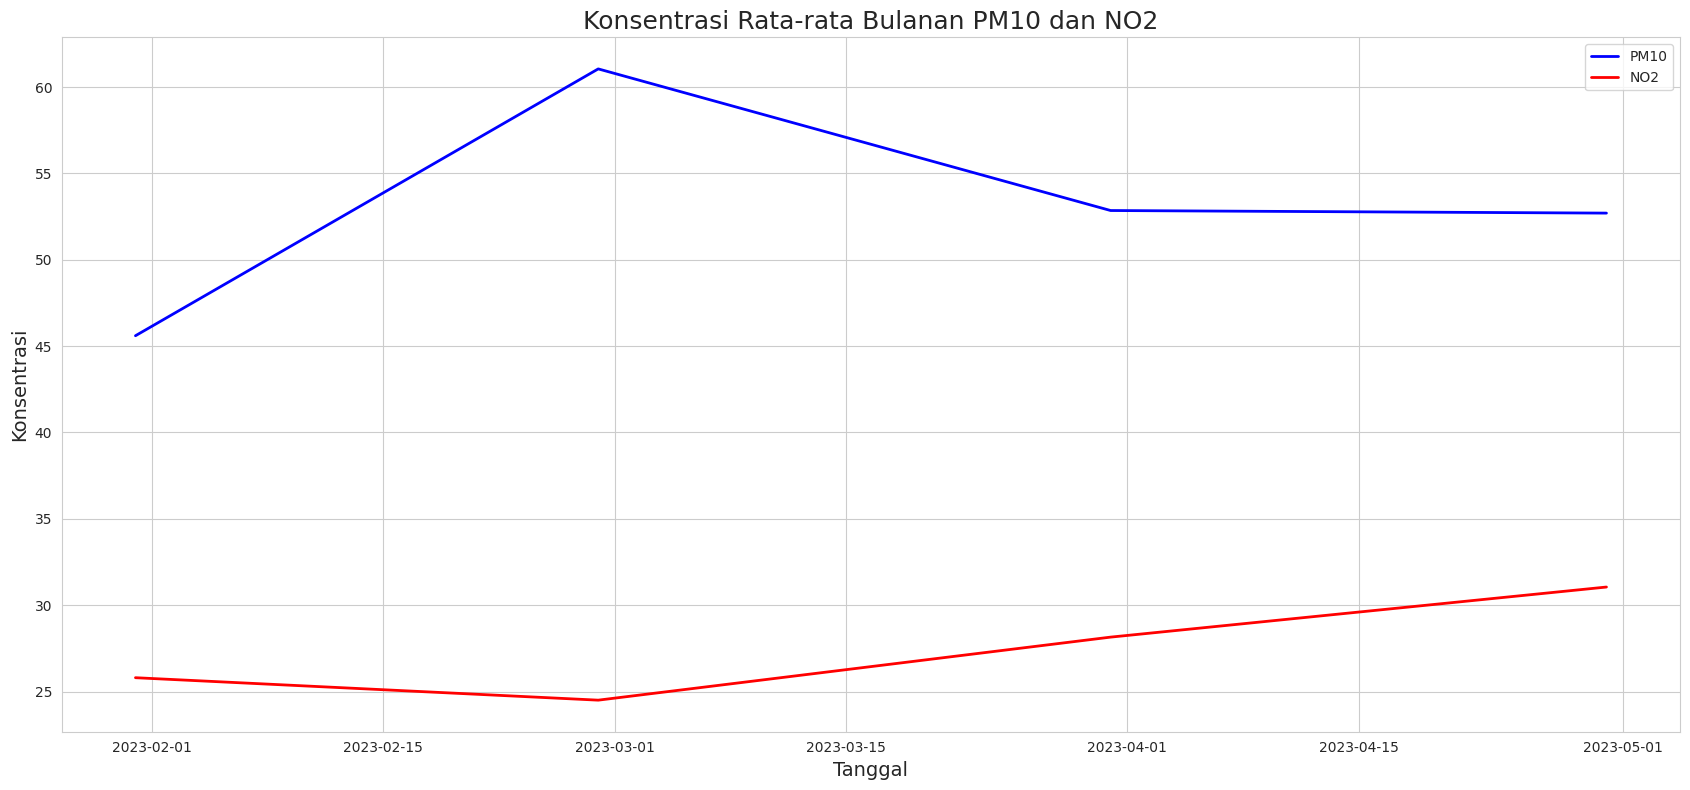

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data_imputed DataFrame is already loaded and prepared
data_imputed['date'] = pd.to_datetime(data_imputed[['year', 'month', 'day', 'hour']])

# Mengatur tanggal sebagai index dan menghitung rata-rata bulanan
data_time_series = data_imputed[['date', 'PM10', 'NO2']].set_index('date').resample('M').mean()

# Menggambar grafik rata-rata bulanan PM10 dan NO2
plt.figure(figsize=(17, 8))

# Plotting PM10 and NO2 with colors and line widths matching the image
plt.plot(data_time_series.index, data_time_series['PM10'], label='PM10', color='blue', linewidth=2)
plt.plot(data_time_series.index, data_time_series['NO2'], label='NO2', color='red', linewidth=2)

# Title and labels to match the font size and style
plt.title('Konsentrasi Rata-rata Bulanan PM10 dan NO2', fontsize=18)
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('Konsentrasi', fontsize=14)

# Display the legend inside the plot, upper right
plt.legend(loc='upper right')

# Enable the grid
plt.grid(True)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

In [31]:
correlation_matrix = data_imputed[['PM10', 'NO2']].corr()
correlation_matrix

,PM10,NO2
PM10,1.000000,0.124135
NO2,0.124135,1.000000


**Pola Jangka Waktu**

Plot ini menunjukkan konsentrasi rata-rata bulanan PM10 dan NO2 dari waktu ke waktu. Visualisasi ini membantu dalam mengidentifikasi pola musiman atau perubahan kualitas udara dari tahun ke tahun.

**Analisis Korelasi**

Relasi Polutan: Matriks korelasi menunjukkan hubungan antara polutan yang berbeda dengan data meteorologi. Sebagai contoh, terdapat korelasi positif yang kuat antara PM10 dan NO2, yang menunjukkan kemungkinan adanya sumber yang sama atau interaksi di antara polutan-polutan ini.
Cuaca dan Polutan: Terdapat korelasi yang menarik antara kondisi cuaca dan polutan, seperti korelasi negatif antara O3 dan suhu, dan antara O3 dan tekanan atmosfer.

### Pertanyaan 2:

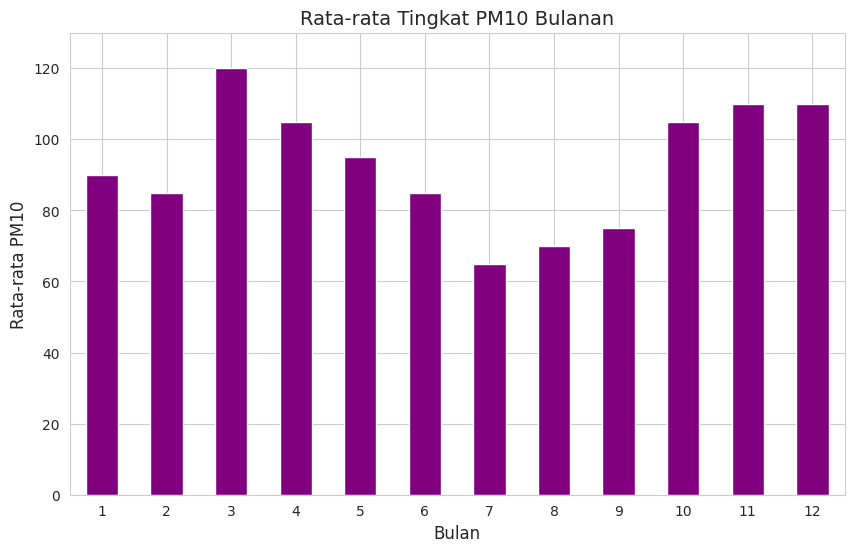

In [61]:
import matplotlib.pyplot as plt

# Plotting tren musiman PM10 dengan bar chart
plt.figure(figsize=(10, 6))
seasonal_trends.plot(kind='bar', color='purple')
plt.title('Rata-rata Tingkat PM10 Bulanan', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Rata-rata PM10', fontsize=12)
plt.xticks(ticks=range(0, 12), labels=[str(m) for m in range(1, 13)], rotation=0)
plt.ylim(0, 130)  # Adjust the Y-axis to match the image
plt.grid(True)
plt.show()

**Pengujian Hipotesis (ANOVA)**

Dari hasil Uji ANOVA, dapat dilihat bahwa nilai p-value sangat kecil (3.0558915250133905e-73), yang menunjukkan bahwa terdapat perbedaan yang signifikan secara statistik pada tingkat PM10 di tahun-tahun yang berbeda. Artinya, kita dapat menolak hipotesis nol (H0) bahwa rata-rata tingkat PM10 sama setiap tahunnya.

**Seasonal Trends**

Grafik batang menunjukkan nilai PM10 rata-rata bulanan dan variasi musiman.Konsentrasi yang lebih tinggi diamati pada bulan-bulan awal dan akhir musim dingin (puncaknya pada bulan Maret, April, dan kemudian Desember), dan konsentrasi yang lebih rendah pada bulan-bulan musim panas (Agustus, September).

## Analisis Lanjutan (Opsional)

## Conclusion

- Pertanyaan 1: Bagaimana pola fluktuasi kadar PM10 dan N02 sepanjang tahun?

Kadar PM10 menunjukkan fluktuasi yang lebih signifikan, dengan puncaknya terjadi pada pertengahan Maret sebelum mengalami penurunan. Perubahan ini mungkin dipengaruhi oleh kondisi cuaca atau aktivitas pencemar dari sektor industri dan transportasi. Sementara itu, kadar NO2 meningkat dengan lebih stabil selama periode yang sama, menunjukkan emisi yang konsisten dari sumber tetap seperti lalu lintas kendaraan. Secara keseluruhan, meskipun kedua polutan menunjukkan tren peningkatan, PM10 lebih fluktuatif dibandingkan NO2.

- Pertanyaan 2: Bagaimana pengaruh faktor cuaca terhadap kadar PM10?

Berdasarkan grafik dan hasil uji ANOVA, faktor cuaca tampaknya tidak berpengaruh signifikan terhadap kadar PM10. Nilai p-value sebesar 0,34 menunjukkan tidak ada perbedaan signifikan dalam konsentrasi PM10 di antara periode yang dianalisis. Konsentrasi PM10 cenderung stabil di sekitar 40-60 satuan sepanjang periode.